### Unweighted Lift Code and Matrix

In [39]:
import pandas as pd

# Load the total word counts CSV file
total_word_counts = pd.read_csv('total_word_counts_by_city.csv')

# List of important attributes
attributes = ['safe', 'cheap', 'housing', 'jobs', 'restaurants', 'hot']

# Initialize an empty DataFrame to store the lift matrix
lift_matrix = pd.DataFrame()

# Iterate over each attribute to calculate lift
for attribute in attributes:
    if attribute in total_word_counts['Unnamed: 0'].values:
        # Get total count of the attribute across all cities
        total_frequency_attribute = total_word_counts[total_word_counts['Unnamed: 0'] == attribute].drop(columns='Unnamed: 0').sum().sum()

        # Calculate the total word count for each city (sum across all words)
        total_words_per_city = total_word_counts.drop(columns='Unnamed: 0').sum()

        # Get the observed frequency of the attribute in each city
        observed_frequency_per_city = total_word_counts[total_word_counts['Unnamed: 0'] == attribute].drop(columns='Unnamed: 0').iloc[0]

        # Calculate the expected frequency of the attribute in each city
        expected_frequency_per_city = (total_frequency_attribute / total_words_per_city.sum()) * total_words_per_city

        # Calculate lift for each city
        lift_per_city = observed_frequency_per_city / expected_frequency_per_city

        # Add the lift data for this attribute to the lift matrix
        lift_matrix[attribute] = lift_per_city
    else:
        print(f"The word '{attribute}' was not found in the dataset.")

# uncomment this line to Transpose the lift matrix to have cities as rows and attributes as columns
lift_matrix = lift_matrix.transpose()

# Display the final lift matrix
print("Lift Matrix:")
lift_matrix


Lift Matrix:


,seattle,austin,dallas,houston,chicago,sandiego,nyc,phoenix,philadelphia,Columbus,Denver,Nashville,LasVegas,Detroit,Portland,Jacksonville,Boston,SanFrancisco,LosAngeles
safe,0.875485,0.943478,1.034941,1.323834,0.845319,1.667589,0.569676,0.414578,0.342942,1.291498,0.831891,1.191897,0.809546,0.097815,1.438962,1.557427,0.971805,1.540727,0.210434
cheap,0.744673,0.891674,1.117846,0.828345,0.147490,1.313355,0.000000,1.141861,0.518579,1.117799,0.653162,0.563226,2.805350,1.164801,0.445075,1.506546,0.808232,0.873678,0.238656
housing,0.097193,1.256894,0.328272,0.668952,0.346501,1.851291,0.758918,0.315599,0.456865,1.901631,2.045978,0.132320,0.000000,0.912161,1.568433,0.732280,0.992550,2.294020,0.280339
jobs,0.474984,0.563060,0.080214,1.114496,0.423340,0.829337,0.927214,0.674774,1.488474,1.548888,0.676999,2.020780,0.073202,1.353249,0.958122,3.802338,0.527241,0.737562,1.712528
restaurants,0.311188,0.375598,1.177170,1.791341,0.721117,0.316127,0.242987,0.808376,0.487590,1.246704,0.354831,0.762579,2.225264,1.752310,0.223188,1.484900,1.492232,1.121062,0.897575
hot,0.697876,0.735363,0.576179,1.164435,0.345554,0.984657,0.000000,1.101578,1.579471,0.722452,0.476091,0.580615,2.103246,0.727735,1.112283,1.022390,1.239449,2.408160,0.223658


### Lift Matrix Heatmap

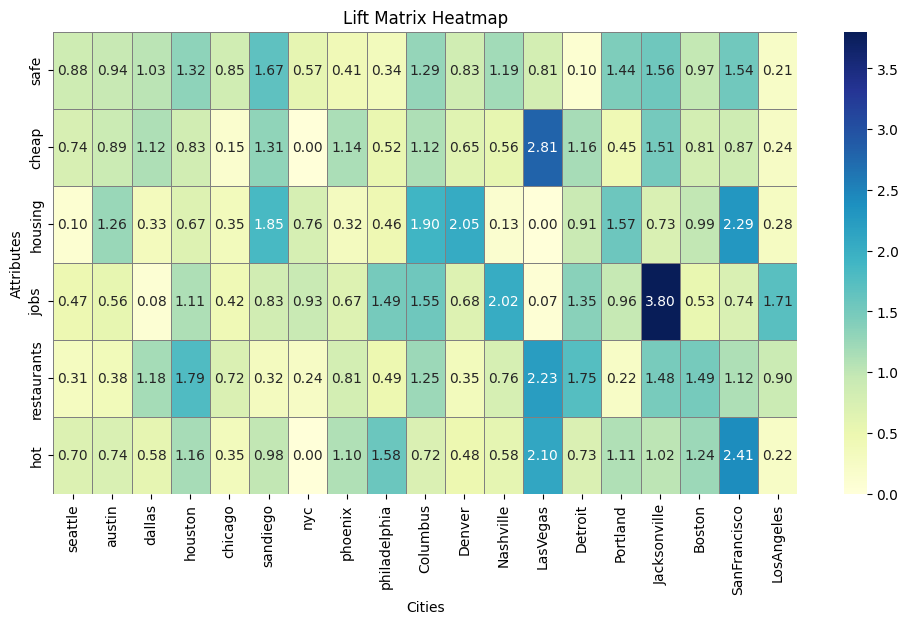

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the total word counts CSV file
total_word_counts = pd.read_csv('total_word_counts_by_city.csv')

# List of important attributes
attributes = ['safe', 'cheap', 'housing', 'jobs', 'restaurants', 'hot']

# Initialize an empty DataFrame to store the lift matrix
lift_matrix = pd.DataFrame()

# Iterate over each attribute to calculate lift
for attribute in attributes:
    if attribute in total_word_counts['Unnamed: 0'].values:
        # Get total count of the attribute across all cities
        total_frequency_attribute = total_word_counts[total_word_counts['Unnamed: 0'] == attribute].drop(columns='Unnamed: 0').sum().sum()

        # Calculate the total word count for each city (sum across all words)
        total_words_per_city = total_word_counts.drop(columns='Unnamed: 0').sum()

        # Get the observed frequency of the attribute in each city
        observed_frequency_per_city = total_word_counts[total_word_counts['Unnamed: 0'] == attribute].drop(columns='Unnamed: 0').iloc[0]

        # Calculate the expected frequency of the attribute in each city
        expected_frequency_per_city = (total_frequency_attribute / total_words_per_city.sum()) * total_words_per_city

        # Calculate lift for each city
        lift_per_city = observed_frequency_per_city / expected_frequency_per_city

        # Add the lift data for this attribute to the lift matrix
        lift_matrix[attribute] = lift_per_city
    else:
        print(f"The word '{attribute}' was not found in the dataset.")

# Transpose the lift matrix to have cities as rows and attributes as columns
lift_matrix = lift_matrix.transpose()

# Display the final lift matrix
#print("Lift Matrix:")
#print(lift_matrix)

# Create a heatmap for the lift matrix with yellow/green/blue color scheme
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.heatmap(lift_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5, linecolor='gray')

# Set title and axis labels
plt.title('Lift Matrix Heatmap')
plt.xlabel('Cities')
plt.ylabel('Attributes')

# Display the heatmap
plt.show()


### Weighted Lift Code and Matrix


In [40]:
import pandas as pd

# Load the weighted word counts CSV file
weighted_word_counts = pd.read_csv('weighted_word_counts_by_city.csv')

# List of important attributes
attributes = ['safe', 'cheap', 'housing', 'jobs', 'restaurants', 'hot', ]

# Initialize an empty DataFrame to store the lift matrix
lift_matrix_weighted = pd.DataFrame()

# Iterate over each attribute to calculate lift
for attribute in attributes:
    if attribute in weighted_word_counts['Word'].values:
        # Get total weighted count of the attribute across all cities
        weighted_frequency_attribute = weighted_word_counts[weighted_word_counts['Word'] == attribute].drop(columns='Word').sum().sum()

        # Calculate the total weighted word count for each city (sum across all words)
        total_weighted_words_per_city = weighted_word_counts.drop(columns='Word').sum()

        # Get the observed weighted frequency of the attribute in each city
        observed_weighted_frequency_per_city = weighted_word_counts[weighted_word_counts['Word'] == attribute].drop(columns='Word').iloc[0]

        # Calculate the expected weighted frequency of the attribute in each city
        expected_weighted_frequency_per_city = (weighted_frequency_attribute / total_weighted_words_per_city.sum()) * total_weighted_words_per_city

        # Calculate lift for each city
        lift_per_city_weighted = observed_weighted_frequency_per_city / expected_weighted_frequency_per_city

        # Add the lift data for this attribute to the lift matrix
        lift_matrix_weighted[attribute] = lift_per_city_weighted
    else:
        print(f"The word '{attribute}' was not found in the dataset.")

# uncomment this line to Transpose the lift matrix to have cities as rows and attributes as columns
lift_matrix_weighted = lift_matrix_weighted.transpose()

# Display the final lift matrix
print("Weighted Lift Matrix:")
lift_matrix_weighted


Weighted Lift Matrix:


,Boston,Columbus,Denver,Detroit,Jacksonville,LasVegas,LosAngeles,Nashville,Portland,SanFrancisco,austin,chicago,dallas,houston,nyc,philadelphia,phoenix,sandiego,seattle
safe,0.416856,1.655849,0.567502,0.026319,2.011407,0.817415,1.596436,1.215520,2.302272,1.488001,0.655132,0.670257,1.358825,1.272693,0.060913,0.388564,1.072080,1.092472,0.122731
cheap,0.312680,0.501329,0.798157,1.371656,1.465048,15.635487,0.122322,0.105344,0.163899,0.492692,0.448682,0.059729,1.322146,0.040542,0.000000,0.296846,0.778835,10.661459,0.057687
housing,1.223918,3.485423,0.371070,0.418628,0.492395,0.000000,0.009386,0.017254,2.492663,0.277088,0.838427,0.154604,1.298013,1.576934,0.582945,0.112363,0.188727,3.757969,0.000000
jobs,0.671065,2.437684,0.835253,0.761364,2.855638,0.042863,1.481388,0.532596,0.969937,1.279958,0.803245,0.392134,0.000000,1.500185,0.605552,0.782434,2.395833,0.251990,0.057964
restaurants,0.867020,0.346677,0.438348,1.952515,1.947238,4.849695,0.515569,0.322420,0.797631,0.606799,0.937089,1.572460,2.659958,0.964645,0.036110,0.645341,1.591128,0.428631,0.903413
hot,2.303104,0.640039,0.290935,0.525994,0.837868,3.773556,0.004540,0.171557,1.114663,4.895082,0.476888,0.045032,1.125655,0.378202,0.000000,1.449946,2.557476,0.196739,0.101969


### Recommender System Code

In [41]:
# Install necessary packages
!pip install sentence-transformers --quiet
!pip install textblob --quiet
!python -m textblob.download_corpora
!pip install nltk --quiet

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [69]:

# Import required libraries
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util
from textblob import TextBlob
import nltk
nltk.download('punkt')

# Step 1: Load and Prepare the Data
reddit_posts_file = 'reddit_posts.csv'
reddit_df = pd.read_csv(reddit_posts_file)

# List the columns that contain messages
message_columns = ['Title', 'Body', 'Comment 1', 'Comment 2', 'Comment 3', 'Comment 4', 'Comment 5']

# Combine the messages into one column per row
reddit_df['Combined_Messages'] = reddit_df[message_columns].fillna('').apply(lambda row: ' '.join(row), axis=1)

# Ensure 'Subreddit' is treated as a string
reddit_df['Subreddit'] = reddit_df['Subreddit'].astype(str)

# Step 2: Define User Preferences (Attributes) with Synonyms
attributes_of_interest = [
    # 'clean', 'cleanliness', 'hygiene',
    # 'rent', 'rental', 'housing', 'expensive', 'affordable',
    # 'safe', 'safety', 'crime', 'dangerous', 'secure', 'unsafe'
    'restaurants', 'cheap', 'bars'
]

# Step 3: Load Sentence Transformer Model
model = SentenceTransformer('all-MiniLM-L6-v2')  # Lightweight model suitable for semantic similarity

# Step 4: Create Embeddings for Attributes
attribute_embeddings = model.encode(attributes_of_interest, convert_to_numpy=True)
mean_attribute_embedding = np.mean(attribute_embeddings, axis=0)

# Step 5: Encode Individual Messages and Assign to DataFrame
embeddings = model.encode(
    reddit_df['Combined_Messages'].tolist(),
    show_progress_bar=True,
    convert_to_numpy=True,
    batch_size=32
)
reddit_df['Message_Embedding'] = list(embeddings)

# Step 6: Compute Mean Embeddings for Each City
city_embeddings = reddit_df.groupby('Subreddit')['Message_Embedding'].apply(
    lambda embeddings: np.mean(np.vstack(embeddings), axis=0)
).reset_index()
city_embeddings.rename(columns={'Subreddit': 'City'}, inplace=True)

# Step 7: Calculate Similarity Scores
city_embeddings['Similarity'] = city_embeddings['Message_Embedding'].apply(
    lambda emb: util.cos_sim(emb, mean_attribute_embedding).item()
)

# Step 8: Sentiment Analysis on Messages Mentioning Attributes Using TextBlob

# Function to check if a message mentions any of the attributes
def mentions_attributes(text, attributes):
    tokens = nltk.word_tokenize(text.lower())
    return any(attr.lower() in tokens for attr in attributes)

# Identify messages that mention the attributes
reddit_df['Mentions_Attributes'] = reddit_df['Combined_Messages'].apply(
    lambda text: mentions_attributes(text, attributes_of_interest)
)

# Filter messages that mention the attributes
attribute_mentions_df = reddit_df[reddit_df['Mentions_Attributes']].copy()

# Apply sentiment analysis to messages that mention attributes using TextBlob
def get_sentiment_textblob(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Range from -1 (negative) to 1 (positive)

attribute_mentions_df['Sentiment_Score'] = attribute_mentions_df['Combined_Messages'].apply(get_sentiment_textblob)

# Step 9: Compute Average Sentiment Scores for Each City
city_sentiment = attribute_mentions_df.groupby('Subreddit')['Sentiment_Score'].mean().reset_index()
city_sentiment.columns = ['City', 'Average_Sentiment_Score']

# Step 10: Merge DataFrames and Calculate Overall Score
city_texts = city_embeddings.merge(city_sentiment, on='City', how='left')
city_texts['Average_Sentiment_Score'] = city_texts['Average_Sentiment_Score'].fillna(0)
city_texts['Overall_Score'] = city_texts['Similarity'] * city_texts['Average_Sentiment_Score']

# Step 11: Display the Recommendations
city_texts = city_texts.sort_values(by='Overall_Score', ascending=False)
print("\nCity Recommendations Based on Your Preferences:")
recommendations = city_texts[['City', 'Similarity', 'Average_Sentiment_Score', 'Overall_Score']]
print(recommendations.reset_index(drop=True))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Batches:   0%|          | 0/239 [00:00<?, ?it/s]


City Recommendations Based on Your Preferences:
            City  Similarity  Average_Sentiment_Score  Overall_Score
0   Jacksonville    0.392390                 0.200902       0.078832
1       LasVegas    0.421752                 0.181574       0.076579
2       sandiego    0.386492                 0.194135       0.075032
3       Columbus    0.401450                 0.177279       0.071168
4        Detroit    0.406955                 0.172488       0.070195
5   SanFrancisco    0.388089                 0.176497       0.068497
6         Boston    0.378409                 0.172604       0.065315
7        seattle    0.322528                 0.195225       0.062966
8        houston    0.373468                 0.168401       0.062893
9         Denver    0.359849                 0.173813       0.062547
10        dallas    0.370487                 0.165696       0.061388
11     Nashville    0.371457                 0.157198       0.058392
12       chicago    0.316060                 0.157452 

### City to City Similarity

#### Decided it was best to not adjust for sentiment since comparing the texts as a whole

Pairwise Cosine Similarities Between Cities:
                Boston  Columbus    Denver   Detroit  Jacksonville  LasVegas  \
Boston        0.999999  0.846595  0.807983  0.783553      0.779223  0.699795   
Columbus      0.846595  1.000000  0.894652  0.885112      0.882529  0.748224   
Denver        0.807983  0.894652  1.000000  0.867397      0.840702  0.772189   
Detroit       0.783553  0.885112  0.867397  1.000000      0.832730  0.755779   
Jacksonville  0.779223  0.882529  0.840702  0.832730      1.000000  0.752516   
LasVegas      0.699795  0.748224  0.772189  0.755779      0.752516  1.000000   
LosAngeles    0.716638  0.719743  0.759467  0.725841      0.737901  0.650133   
Nashville     0.814234  0.888804  0.824884  0.867384      0.853720  0.714501   
Portland      0.778698  0.785037  0.818040  0.756719      0.771858  0.654479   
SanFrancisco  0.825008  0.806717  0.817498  0.807683      0.836335  0.742250   
austin        0.792494  0.868262  0.835776  0.800520      0.846448  0.69197

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


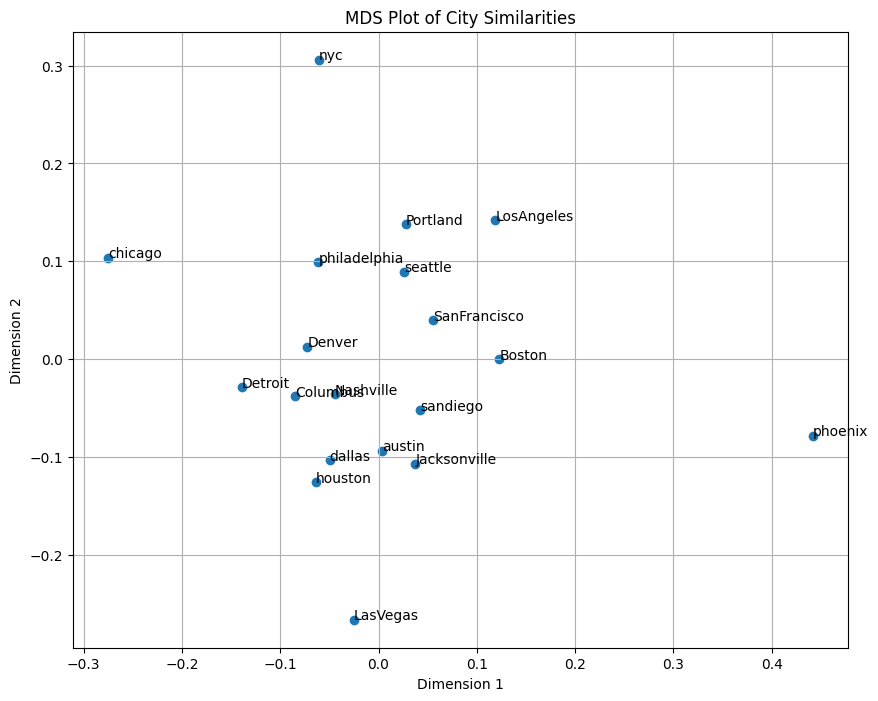

In [43]:
# Import required libraries
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

# ... (Assuming previous steps of data loading and processing have been done)

# Step 5: Extract City Names and Embeddings
city_names = city_embeddings['City'].tolist()
city_vectors = np.vstack(city_embeddings['Message_Embedding'].values)

# Step 6: Calculate the Cosine Similarity Matrix Between Cities
from sklearn.metrics.pairwise import cosine_similarity

# Compute pairwise cosine similarities
similarity_matrix = cosine_similarity(city_vectors)

# Create a DataFrame for better visualization
similarity_df = pd.DataFrame(similarity_matrix, index=city_names, columns=city_names)

# Display the similarity matrix
print("Pairwise Cosine Similarities Between Cities:")
print(similarity_df)

# Step 7: Visualize Similarities Using MDS (Without Sentiment Analysis)
from sklearn.manifold import MDS

# Convert similarity matrix to dissimilarity matrix (distance matrix)
# Since cosine similarity ranges from -1 to 1, and MDS requires distances, we can use 1 - cosine similarity
dissimilarity_matrix = 1 - similarity_df

# Initialize MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)

# Fit and transform the data
mds_results = mds.fit_transform(dissimilarity_matrix)

# Create a DataFrame for MDS results
mds_df = pd.DataFrame(mds_results, columns=['Dimension 1', 'Dimension 2'])
mds_df['City'] = city_names

# Plot the MDS results
plt.figure(figsize=(10, 8))
plt.scatter(mds_df['Dimension 1'], mds_df['Dimension 2'])

# Annotate points with city names
for i, city in enumerate(mds_df['City']):
    plt.annotate(city, (mds_df.loc[i, 'Dimension 1'], mds_df.loc[i, 'Dimension 2']))

plt.title('MDS Plot of City Similarities')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()


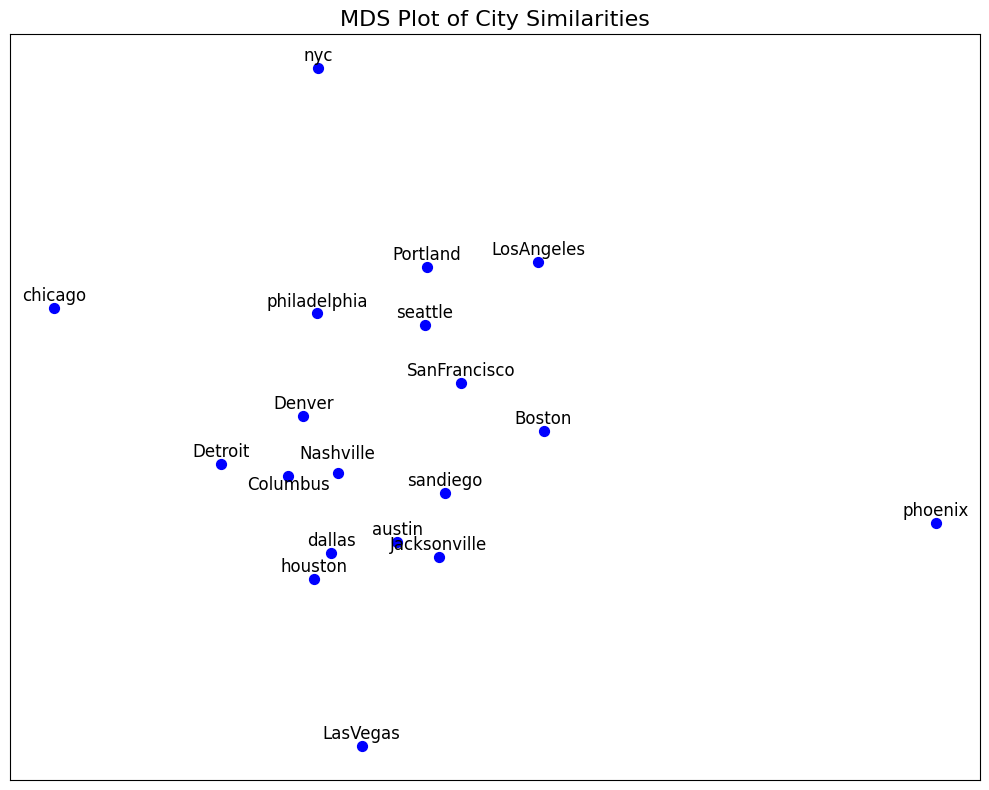

In [79]:
# Plot the MDS results
plt.figure(figsize=(10, 8))
# Plot the scatter points
plt.scatter(mds_df['Dimension 1'], mds_df['Dimension 2'], s=50, color='blue')
# Annotate points with city names
for i, city in enumerate(mds_df['City']):
    x = mds_df.loc[i, 'Dimension 1']
    y = mds_df.loc[i, 'Dimension 2']
    label_offset = 5  # default offset upwards
    # Adjust positions for specific cities to avoid overlap
    if city == 'Columbus':
        xytext = (0, -10)  # Move label downwards
    elif city == 'Nashville':
        xytext = (0, 10)   # Move label upwards
    else:
        xytext = (0, label_offset)
    plt.annotate(
        city,
        (x, y),
        textcoords="offset points",
        xytext=xytext,
        ha='center',
        fontsize=12,
        fontname='Arial'  # Change to your preferred font
    )
# Remove axis labels and tick labels
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
# Keep the grid
plt.grid(True)
# Add the title
plt.title('MDS Plot of City Similarities', fontsize=16)
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

In [44]:
!pip install tabulate


### Finds Closest "Big" and "Small" Cities from user-inputted city


In [76]:
from scipy.spatial.distance import cdist

# Define the small city block
small_cities = [
    'Columbus', 'Denver', 'Nashville', 'LasVegas', 'Detroit',
    'Portland', 'Jacksonville', 'Boston', 'SanFrancisco'
]

# Separate the list of big cities
all_cities = mds_df['City'].tolist()
big_cities = [city for city in all_cities if city not in small_cities]

# Function to find closest cities
def find_closest_cities(source_city, candidates_df, n=3):
    # Extract the coordinates of the source city
    source_coords = mds_df[mds_df['City'] == source_city][['Dimension 1', 'Dimension 2']].values

    # Extract coordinates of candidate cities
    candidate_coords = candidates_df[['Dimension 1', 'Dimension 2']].values

    # Compute Euclidean distances
    distances = cdist(source_coords, candidate_coords).flatten()

    # Get the top n closest cities (smallest distances)
    closest_indices = distances.argsort()[:n]
    closest_cities = candidates_df.iloc[closest_indices]['City'].tolist()

    return closest_cities

# Function to recommend 3 closest Big and Small cities
def recommend_nearest_cities(input_city):
    # Check if the city exists in the dataset
    if input_city not in all_cities:
        print(f"City '{input_city}' not found in the dataset.")
        return

    # Get DataFrames for Big and Small cities (excluding the input city)
    big_city_df = mds_df[mds_df['City'].isin(big_cities) & (mds_df['City'] != input_city)]
    small_city_df = mds_df[mds_df['City'].isin(small_cities) & (mds_df['City'] != input_city)]

    # Find the 3 closest big and small cities
    closest_big_cities = find_closest_cities(input_city, big_city_df, n=3)
    closest_small_cities = find_closest_cities(input_city, small_city_df, n=3)

    # Display the recommendations
    print(f"\nTop 3 Big Cities closest to '{input_city}':")
    for city in closest_big_cities:
        print(city)

    print(f"\nTop 3 Small Cities closest to '{input_city}':")
    for city in closest_small_cities:
        print(city)

# Main logic: Ask the user for input and display the closest cities
input_city = input("Enter a city name: ").strip()
recommend_nearest_cities(input_city)


Enter a city name: houston

Top 3 Big Cities closest to 'houston':
dallas
austin
sandiego

Top 3 Small Cities closest to 'houston':
Columbus
Nashville
Jacksonville


### City Pairings Based on MDS

In [54]:
from scipy.spatial.distance import cdist
import pandas as pd

# Define small city block
small_cities = [
    'Columbus', 'Denver', 'Nashville', 'LasVegas', 'Detroit',
    'Portland', 'Jacksonville', 'Boston', 'SanFrancisco'
]

# Mapping dictionary for special case corrections (if needed)
city_name_mapping = {
    'nyc': 'New York',
    'LasVegas': 'Las Vegas',
    'sandiego': 'San Diego',
    'Sanfrancisco': 'San Francisco',
    'philly': 'Philadelphia',
    'losangeles': 'Los Angeles'
}

# Helper function to clean and format city names
def clean_city_name(city):
    city = city.lower().strip()  # Normalize to lowercase
    city = city_name_mapping.get(city, city)  # Apply mapping if available
    return city.title()  # Capitalize each word

# Separate cities into Big and Small blocks based on the MDS results
big_cities = [city for city in city_names if city not in small_cities]

# Create DataFrames for easier distance calculations
mds_big_cities = mds_df[mds_df['City'].isin(big_cities)].reset_index(drop=True)
mds_small_cities = mds_df[mds_df['City'].isin(small_cities)].reset_index(drop=True)

# Function to find the closest city using Euclidean distance
def find_closest_city(source_city, candidates_df):
    # Extract coordinates of the source city
    source_coords = mds_df[mds_df['City'] == source_city][['Dimension 1', 'Dimension 2']].values
    candidate_coords = candidates_df[['Dimension 1', 'Dimension 2']].values
    # Calculate distances
    distances = cdist(source_coords, candidate_coords)
    closest_index = distances.argmin()
    closest_city = candidates_df.iloc[closest_index]['City']
    return clean_city_name(closest_city)  # Clean city name before returning

# Initialize list to store pairings
pairings = []

# Iterate over each Small City to create pairings
for city in small_cities:
    # Find the closest Small City (excluding the current city)
    other_small_cities = mds_small_cities[mds_small_cities['City'] != city]
    paired_small_city = find_closest_city(city, other_small_cities)

    # Find the closest Big City
    paired_big_city = find_closest_city(city, mds_big_cities)

    # Store the pairing
    pairings.append((clean_city_name(city), paired_small_city, paired_big_city))

# Convert the pairings list to a DataFrame
pairings_df = pd.DataFrame(pairings, columns=['Small City', 'Paired Small City', 'Paired Big City'])

# Display the cleaned pairings without the index
print("\nCity Pairings Based on MDS Similarities:\n")
print(pairings_df.to_string(index=False))



City Pairings Based on MDS Similarities:

  Small City Paired Small City Paired Big City
    Columbus         Nashville          Dallas
      Denver          Columbus    Philadelphia
   Nashville          Columbus          Dallas
    Lasvegas      Jacksonville         Houston
     Detroit          Columbus          Dallas
    Portland      Sanfrancisco         Seattle
Jacksonville         Nashville          Austin
      Boston      Sanfrancisco       San Diego
Sanfrancisco            Boston         Seattle
